## This notebook will do statistics analysis based on our experiment using Pandas

In [21]:
np.random.normal?

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df2 = pd.read_csv('noisy_circle_update_metric_euc_to_minkow1.csv')
df3 = pd.read_csv('bats_flag_compare_to_updating.csv')
df4 = pd.read_csv('bats_comp_other_package.csv')

### Noisy circle with different size

In [3]:
df1 = pd.read_csv('noisy_circle_2D_3D_change_std.csv') # not used for now

In [4]:
# sum over several columns and insert the into dataframe
df1.insert(loc=10, column='reb_total', value=(df1['setup2'] + df1['construct2'] + df1['reduce2']))
df1.insert(loc=11, column='upd_total', value=(df1['setup2'] + df1['construct2'] + df1['update']))
df1.head()

std  n_points  dimension    setup1  construct1   reduce1    setup2  \
0  0.001        20          2  0.000084    0.000213  0.000867  0.000059   
1  0.001        20          2  0.000057    0.000166  0.000611  0.000053   
2  0.001        20          2  0.000115    0.000165  0.000610  0.000053   
3  0.001        20          2  0.000059    0.000166  0.000602  0.000052   
4  0.001        20          2  0.000053    0.000164  0.000607  0.000052   

   construct2   reduce2    update  reb_total  upd_total  nnz_old_U  nnz_reb_U  \
0    0.000174  0.000764  0.000491   0.000998   0.000725       5435       5435   
1    0.000167  0.000603  0.000365   0.000823   0.000586       5435       5435   
2    0.000165  0.000599  0.000363   0.000817   0.000582       5435       5435   
3    0.000172  0.000596  0.000366   0.000820   0.000591       5435       5435   
4    0.000165  0.000592  0.000367   0.000809   0.000585       5435       5435   

   nnz_upd_U  nnz_old_R  nnz_reb_R  nnz_upd_R  
0       5435        462        462        462  
1       5435        462        462        462  
2       5435        462        462        462  
3       5435        462        462        462  
4       5435        462        462        462

In [5]:
df1.insert(loc=12, column='nnz_reb', value=(df1['nnz_reb_R'] + df1['nnz_reb_U']))
df1.insert(loc=13, column='nnz_upd', value=(df1['nnz_upd_R'] + df1['nnz_upd_U']))

In [6]:
# only look at rows with dimension at 2 and number of points == 20 and std == 0.001
a = df1.loc[(df1['dimension'] == 2) & (df1['n_points'] == 100)]
b = a.groupby(['std']).mean()[['reb_total', 'nnz_reb','upd_total', 'nnz_upd']] # look at different std's effect
b

reb_total  nnz_reb  upd_total  nnz_upd
std                                          
0.001   0.438396  2926556   0.211023  2966738
0.005   0.412766  2599712   0.199032  2556496
0.010   0.354282  2519707   0.194765  2210269
0.050   0.245433  1763128   0.200563  1575294
0.100   0.217949  1546088   0.242853  1612128
0.500   0.162542  1156628   0.643568  2301831
1.000   0.454799  3230183   1.797882  6398018

In [7]:
# Remove the last row to make the picture clearer (std = 1 seems to be an outiler)
c = b.iloc[:6,:]
c

reb_total  nnz_reb  upd_total  nnz_upd
std                                          
0.001   0.438396  2926556   0.211023  2966738
0.005   0.412766  2599712   0.199032  2556496
0.010   0.354282  2519707   0.194765  2210269
0.050   0.245433  1763128   0.200563  1575294
0.100   0.217949  1546088   0.242853  1612128
0.500   0.162542  1156628   0.643568  2301831

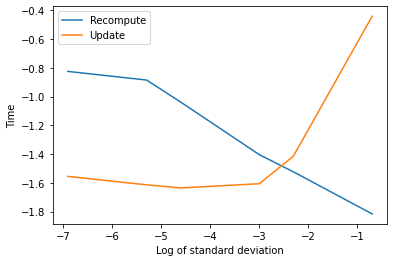

In [10]:
std = np.array(c.index)
plt.plot(np.log(std), np.log(c['reb_total']), label = 'Recompute')
plt.plot(np.log(std), np.log(c['upd_total']), label = 'Update')
plt.xlabel('Log of standard deviation')
plt.ylabel('Log of Time')
plt.legend()
plt.savefig('Time_vs_log_std.svg',dpi=600)

In [14]:
# We can also easily see the average information by group them together
df1.groupby(['std','n_points','dimension']).mean()

setup1  construct1   reduce1    setup2  \
std   n_points dimension                                             
0.001 20       2          0.000073    0.000168  0.000621  0.000053   
               3          0.000064    0.000445  0.002493  0.000069   
      40       2          0.000074    0.001412  0.010554  0.000057   
               3          0.000142    0.010044  0.156399  0.000106   
      50       2          0.000096    0.002904  0.023526  0.000072   
      100      2          0.000219    0.031355  0.405182  0.000169   
0.005 20       2          0.000063    0.000165  0.000592  0.000053   
               3          0.000065    0.000499  0.002925  0.000071   
      40       2          0.000075    0.001191  0.007002  0.000058   
               3          0.000145    0.010689  0.189953  0.000109   
      50       2          0.000093    0.002503  0.025822  0.000073   
      100      2          0.000213    0.030630  0.404969  0.000169   
0.010 20       2          0.000065    0.000163  0.000686  0.000055   
               3          0.000068    0.000414  0.002182  0.000068   
      40       2          0.000074    0.001150  0.008687  0.000058   
               3          0.000145    0.011897  0.161428  0.000110   
      50       2          0.000099    0.002911  0.032133  0.000074   
      100      2          0.000212    0.030008  0.305019  0.000171   
0.050 20       2          0.000061    0.000205  0.000848  0.000057   
               3          0.000066    0.000497  0.003022  0.000070   
      40       2          0.000075    0.001484  0.011801  0.000058   
               3          0.000139    0.011495  0.184954  0.000109   
      50       2          0.000089    0.002783  0.021443  0.000069   
      100      2          0.000209    0.030447  0.341980  0.000169   
0.100 20       2          0.000060    0.000191  0.000876  0.000057   
               3          0.000062    0.000371  0.001732  0.000066   
      40       2          0.000075    0.001251  0.009445  0.000058   
               3          0.000142    0.006617  0.066643  0.000097   
      50       2          0.000088    0.002972  0.024606  0.000069   
      100      2          0.000212    0.031144  0.398115  0.000169   
0.500 20       2          0.000084    0.000189  0.000798  0.000058   
               3          0.000065    0.000448  0.002493  0.000069   
      40       2          0.000075    0.001397  0.011127  0.000058   
               3          0.000141    0.011537  0.146779  0.000110   
      50       2          0.000088    0.002945  0.024407  0.000069   
      100      2          0.000212    0.029040  0.300250  0.000168   
1.000 20       2          0.000101    0.000169  0.000598  0.000054   
               3          0.000068    0.000488  0.002390  0.000070   
      40       2          0.000076    0.001412  0.013065  0.000058   
               3          0.000140    0.011346  0.135946  0.000109   
      50       2          0.000091    0.002933  0.020226  0.000069   
      100      2          0.000223    0.033077  0.445284  0.000172   

                          construct2   reduce2    update  reb_total  \
std   n_points dimension                                              
0.001 20       2            0.000167  0.000604  0.000370   0.000824   
               3            0.000449  0.002373  0.001141   0.002891   
      40       2            0.001424  0.010619  0.004878   0.012100   
               3            0.010632  0.159419  0.056207   0.170157   
      50       2            0.002897  0.023347  0.010303   0.026316   
      100      2            0.031037  0.407190  0.179817   0.438396   
0.005 20       2            0.000161  0.000566  0.000364   0.000780   
               3            0.000520  0.002934  0.001677   0.003526   
      40       2            0.001224  0.007325  0.004727   0.008607   
               3            0.011860  0.199169  0.092651   0.211137   
      50       2            0.002551  0.026009  0.011799   0.028632   
      100      2        

### Update metric from Euclidean to Minkowski 1

In [47]:
# insert columns 
df2.insert(loc=10, column='reb_total', value=(df2['setup2'] + df2['construct2'] + df2['reduce2']))
df2.insert(loc=11, column='upd_total', value=(df2['setup2'] + df2['construct2'] + df2['update']))
# group them
a = df2.groupby(['std','n_points','dimension']).mean()
a

setup1  construct1    reduce1    setup2  \
std   n_points dimension                                              
0.005 100      2          0.000212    0.030085   0.335823  0.000153   
               3          0.000227    0.972687  23.575383  0.000175   

                          construct2   reduce2     update  reb_total  \
std   n_points dimension                                               
0.005 100      2            0.019418  0.179191   0.293341   0.198762   
               3            0.544418  6.890051  21.254431   7.434643   

                          upd_total  nnz_old_U  nnz_reb_U  nnz_upd_U  \
std   n_points dimension                                               
0.005 100      2           0.312912    2477549    1438095    1445668   
               3          21.799024   82999518   30485387   54435336   

                          nnz_old_R  nnz_reb_R  nnz_upd_R  
std   n_points dimension                                   
0.005 100      2              13879      12057      21532  
               3             582066     353571     678444

In [20]:
# dataframe also provides 
a[['reb_total', 'upd_total']]

reb_total  upd_total
std   n_points dimension                      
0.005 100      2           0.198762   0.312912
               3           7.434643  21.799024

### Comparison in BATs with Flag 

In [23]:
df3.groupby(['std','n_points','dimension']).mean()

standard_basis  standard_no_basis  clearing  \
std   n_points dimension                                                
0.001 100      2                0.388332           0.208164  0.206494   
               3               11.939154           6.480755  6.241965   
0.005 100      2                0.500734           0.255261  0.253894   
               3               12.085571           6.839052  6.528163   

                          compression     update  
std   n_points dimension                          
0.001 100      2             0.202591   0.202414  
               3             5.166033   4.408238  
0.005 100      2             0.227085   0.222980  
               3             5.417669  12.887104

### Comarison with other packages
Be care the column 'topologylayer' is sometimes 0, because we do not compute it for its slowness.

In [31]:
import pandas as pd
df = pd.read_csv('sphere_record100_H1.csv')
df.mean()

n_points             100.000000
dimension              2.000000
std                    0.001000
standard_basis         0.435853
standard_no_basis      0.237171
clearing               0.234364
compression            0.224796
update                 0.196185
topologylayer          0.000000
gudhi                  0.050523
dionysus               0.739139
ripser                 0.011950
dtype: float64

In [30]:
import pandas as pd
df = pd.read_csv('sphere_record100_H2.csv')
df.mean()

n_points             100.000000
dimension              3.000000
std                    0.001000
standard_basis        20.444866
standard_no_basis     10.604927
clearing              10.223926
compression            7.666793
update                 6.819714
topologylayer          0.000000
gudhi                  2.302266
dionysus              32.241005
ripser                 0.167025
dtype: float64

## Optimization Problem

In [54]:
import pandas as pd
df5 = pd.read_csv('opt_enc_rips.csv')
df5.mean()

std_basis          1.654738e-01
std_no_basis       9.742736e-02
std_clearing       9.936113e-02
std_compression    8.876377e-02
update             8.898671e-02
nnz_basis          9.936110e+03
nnz_no_basis       9.936110e+03
nnz_clear          9.936110e+03
nnz_compress       9.084590e+03
nnz_upd            1.019792e+06
dtype: float64

In [61]:
np.around(np.array(df5.mean()), decimals = 5)

array([1.65470000e-01, 9.74300000e-02, 9.93600000e-02, 8.87600000e-02,
       8.89900000e-02, 9.93611000e+03, 9.93611000e+03, 9.93611000e+03,
       9.08459000e+03, 1.01979221e+06])

In [62]:
np.array(df5.mean())

array([1.65473846e-01, 9.74273586e-02, 9.93611309e-02, 8.87637741e-02,
       8.89867071e-02, 9.93611000e+03, 9.93611000e+03, 9.93611000e+03,
       9.08459000e+03, 1.01979221e+06])

In [10]:
df5

std_basis  std_no_basis  std_clearing  std_compression    update  \
0    0.164998      0.090893      0.083504         0.082485  0.064526   
1    0.189800      0.108866      0.118005         0.110150  0.079554   
2    0.176348      0.102532      0.090572         0.086405  0.068321   
3    0.172017      0.102269      0.087188         0.088919  0.087903   
4    0.166409      0.099753      0.102887         0.092419  0.077904   
..        ...           ...           ...              ...       ...   
95   0.153332      0.093306      0.094736         0.085053  0.088599   
96   0.151659      0.091822      0.090552         0.080578  0.088854   
97   0.152210      0.090741      0.093305         0.079377  0.090587   
98   0.155322      0.092486      0.093902         0.079230  0.093155   
99   0.157882      0.092406      0.090900         0.081960  0.095477   

    nnz_basis  nnz_no_basis  nnz_clear  nnz_compress    nnz_upd  
0     10001.0       10001.0    10001.0        9251.0  1034745.0  
1     10008.0       10008.0    10008.0        9258.0  1036996.0  
2     10007.0       10007.0    10007.0        9250.0  1033594.0  
3      9992.0        9992.0     9992.0        9246.0  1027524.0  
4      9988.0        9988.0     9988.0        9233.0  1026018.0  
..        ...           ...        ...           ...        ...  
95     9830.0        9830.0     9830.0        8955.0  1000510.0  
96     9810.0        9810.0     9810.0        8946.0   994985.0  
97     9807.0        9807.0     9807.0        8942.0   993707.0  
98     9816.0        9816.0     9816.0        8933.0   996807.0  
99     9814.0        9814.0     9814.0        8943.0   997053.0  

[100 rows x 10 columns]

## Bunny

In [5]:
import pandas as pd
df = pd.read_csv('bunny_record.csv')
df.mean()

standard_basis       2.718319
standard_no_basis    1.722503
clearing             1.661456
compression          1.527316
update               2.060139
topologylayer        0.000000
gudhi                0.815585
dionysus             0.000000
ripser               1.109744
dtype: float64

In [8]:
df = pd.read_csv('bunny_record200.csv')
df.mean()

standard_basis       136.532624
standard_no_basis     81.107806
clearing              79.544701
compression           71.028392
update               144.893277
topologylayer          0.000000
gudhi                 31.011183
dionysus               0.000000
ripser                36.930185
dtype: float64

In [18]:
import pandas as pd
df = pd.read_csv('bunny_record400_H1.csv')
df.mean()

standard_basis       61.121096
standard_no_basis    28.483642
clearing             28.419567
compression          24.012001
update               25.269536
topologylayer         0.000000
gudhi                 4.493279
dionysus              0.000000
ripser                0.084670
dtype: float64

## Dragon

In [13]:
import pandas as pd
df = pd.read_csv('dragon_record.csv')
df.mean()

standard_basis       2.999401
standard_no_basis    1.811206
clearing             1.739355
compression          1.555096
update               2.747991
topologylayer        0.000000
gudhi                0.659207
dionysus             0.000000
ripser               0.928245
dtype: float64

In [9]:
import pandas as pd
df = pd.read_csv('dragon_record200.csv') # compute up to H2
df.mean()

standard_basis       60.129023
standard_no_basis    35.640429
clearing             34.618804
compression          30.692923
update               98.459423
topologylayer         0.000000
gudhi                12.105684
dionysus              0.000000
ripser               15.341940
dtype: float64

In [17]:
import pandas as pd
df = pd.read_csv('dragon_record400_H1.csv')
df.mean()

standard_basis       47.999819
standard_no_basis    20.305988
clearing             20.256985
compression          16.078695
update               19.024916
topologylayer         0.000000
gudhi                 2.524282
dionysus              0.000000
ripser                0.075093
dtype: float64

## H3N2

In [18]:
import pandas as pd
df = pd.read_csv('H3N2_record.csv')
df.mean()

standard_basis       9.192027
standard_no_basis    5.758595
clearing             5.685480
compression          5.153021
update               5.714532
topologylayer        0.000000
gudhi                2.698835
dionysus             0.000000
ripser               3.442184
dtype: float64

In [12]:
import pandas as pd
df = pd.read_csv('H3N2_record200.csv') # compute up to H2
df.mean()

standard_basis       158.971069
standard_no_basis    105.904937
clearing             104.999920
compression           97.100792
update               117.541906
topologylayer          0.000000
gudhi                 57.221182
dionysus               0.000000
ripser                65.230054
dtype: float64

In [16]:
import pandas as pd
df = pd.read_csv('H3N2_record200_H1.csv') # compute up to H1
df.mean()

standard_basis       2.503682
standard_no_basis    1.552463
clearing             1.540656
compression          1.621170
update               1.867409
topologylayer        0.000000
gudhi                0.599829
dionysus             0.000000
ripser               0.019629
dtype: float64

In [20]:
import pandas as pd
df = pd.read_csv('H3N2_record400_H1.csv') # compute up to H1
df.mean()

standard_basis       28.350523
standard_no_basis    17.626974
clearing             17.508533
compression          18.053020
update               20.766845
topologylayer         0.000000
gudhi                 6.571999
dionysus              0.000000
ripser                0.082798
dtype: float64

## Klein

In [11]:
df = pd.read_csv('klein_record.csv')
df.mean()

standard_basis       4.101115
standard_no_basis    2.665651
clearing             2.547773
compression          2.389811
update               3.202638
topologylayer        0.000000
gudhi                1.211843
dionysus             0.000000
ripser               1.679999
dtype: float64

In [22]:
df = pd.read_csv('klein_record200_H2.csv')
df.mean()

standard_basis       126.160260
standard_no_basis     73.389923
clearing              70.939965
compression           63.003894
update               164.901183
topologylayer          0.000000
gudhi                 26.670871
dionysus               0.000000
ripser                 0.770095
dtype: float64

In [24]:
df = pd.read_csv('klein_record100_H2.csv')
df.mean()

standard_basis       4.892279
standard_no_basis    2.921320
clearing             2.805372
compression          2.493932
update               2.532544
topologylayer        0.000000
gudhi                0.994829
dionysus             0.000000
ripser               0.078464
dtype: float64